<a href="https://colab.research.google.com/github/beimnet777/Breast-Cancer-Detection/blob/main/Breast_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.3 MB/s eta 0:00:00


In [ ]:
import pydicom
import cv2
import tensorflow as tf
import os
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
def change_mask_to_bw(image):
  img = image
  # gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  (thresh, im_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  dilated=cv2.dilate(im_bw,np.ones((3,3)),iterations=4)
  return dilated

In [ ]:
def find_contours(mask):
  contours, hierarchy = cv2.findContours(
      mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  x, y, w, h=None,None,None,None
  area=0
  for index,cnt in enumerate(contours):
    x_, y_, w_, h_ = cv2.boundingRect(cnt)
    new_area=abs(w_*h_)
    if new_area>area:
      area=new_area
      x, y, w, h=x_, y_, w_, h_
  return (w,h,x,y)

In [ ]:
def crop_image_(image,mask):
  
  bw_image=change_mask_to_bw(image)
  cv2_imshow(bw_image)
  (w,h,x,y)=find_contours(bw_image)
  
  x-=50
  y-=50
  w+=50
  h+=50

  cropped_image = image[y:y+h, x:x+w]
  cropped_mask=mask[y:y+h, x:x+w]
  return cropped_image,cropped_mask


In [ ]:
def mask_preparation(image,lower,upper):

  mask = cv2.inRange(image, lower, upper)

  image[mask > 0] = [255, 255, 255]

  image[mask == 0] = [0, 0, 0]

  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # cv2_imshow(gray_image)

  return gray_image

In [ ]:
def get_medical_image(path):
  
  ds = pydicom.dcmread(path)

  pixel_data = ds.pixel_array

  pixel_data = (pixel_data - pixel_data.min()) / (pixel_data.max() - pixel_data.min())
  pixel_data = (pixel_data * 255).astype('uint8')

  # Create an OpenCV image from the pixel data
  # img = cv2.cvtColor(pixel_data, cv2.COLOR_GRAY2BGR)
  cv2_imshow(pixel_data)

  return pixel_data

In [ ]:
def remove_texts(image):

  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  _, mask = cv2.threshold(image, 240, 255, cv2.THRESH_BINARY)


  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
  mask = cv2.dilate(mask, kernel)


  image[mask == 255] = 0
  return image


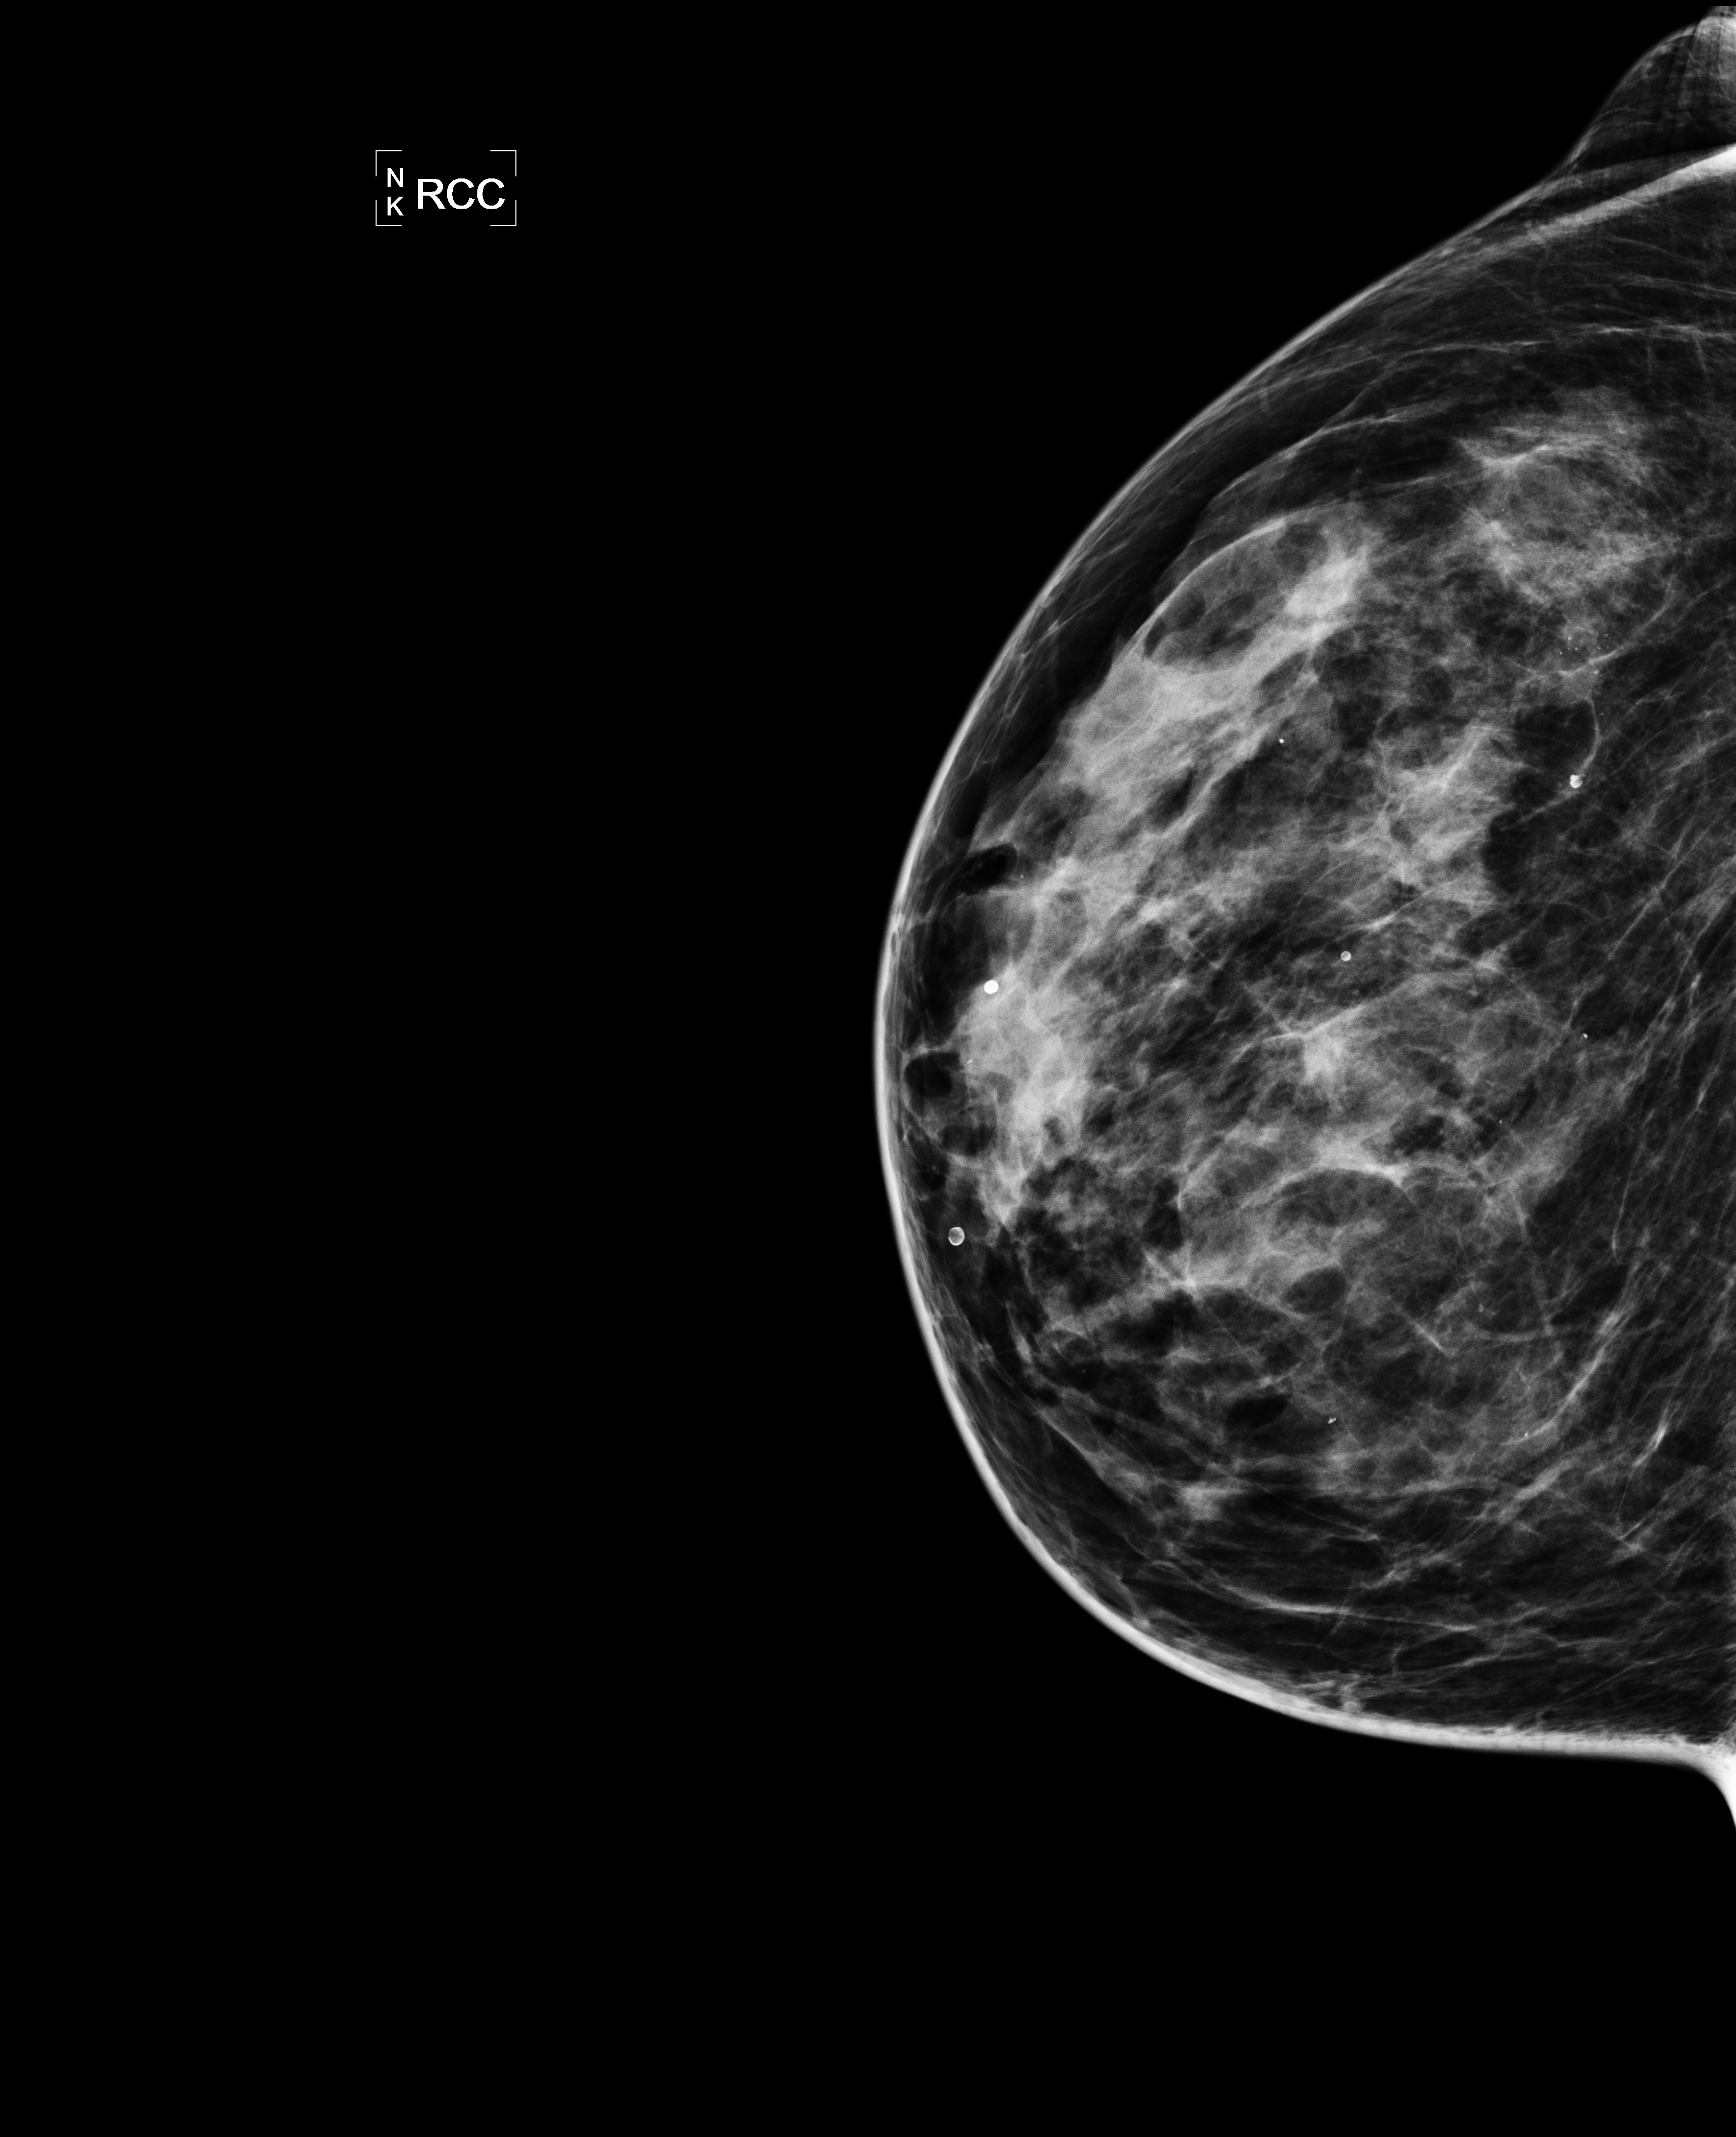

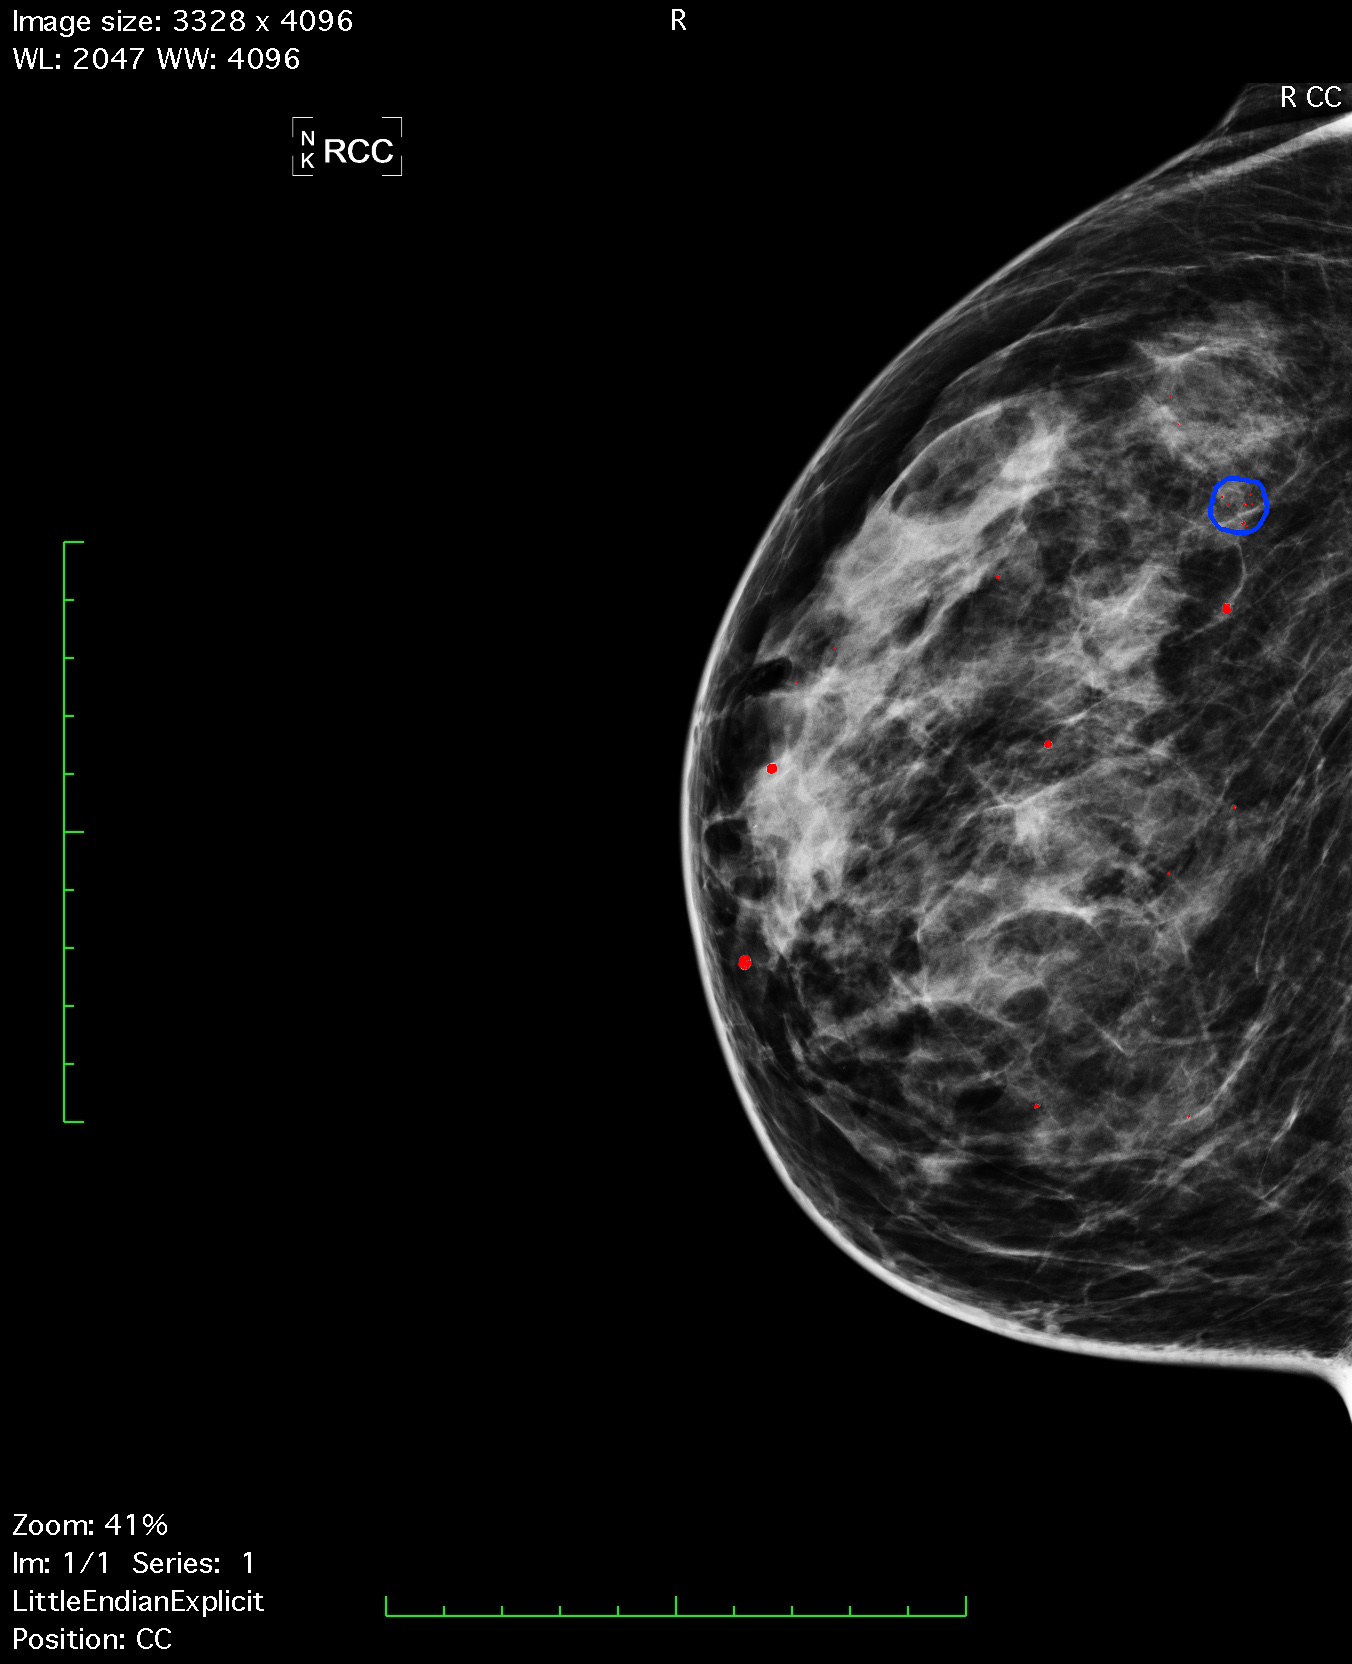

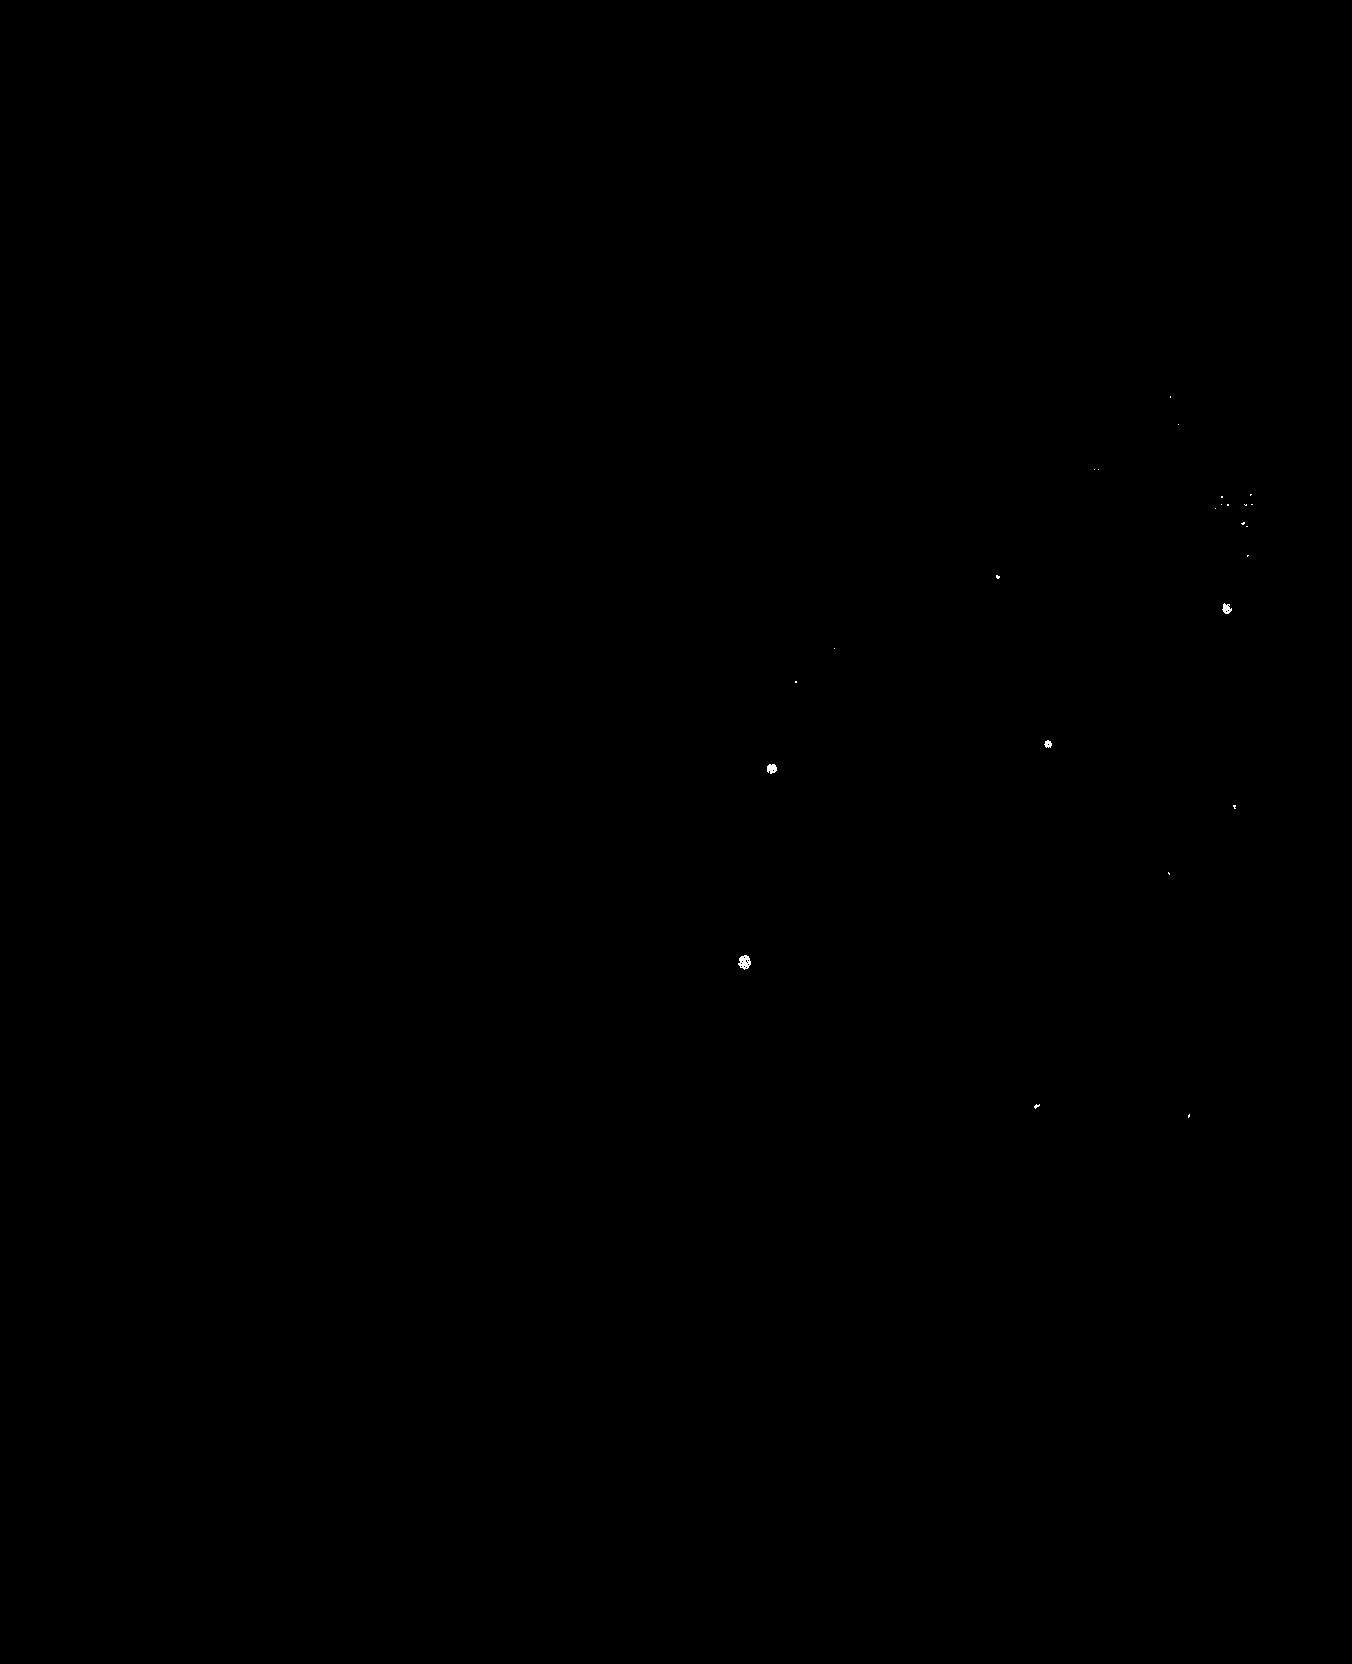

In [ ]:
medical_image=get_medical_image("/content/drive/MyDrive/Dataset/Dataset/Suspicious_cases/1/CC_prior.dcm")
# medical_image=remove_texts(medical_image)


mask=cv2.imread("/content/drive/MyDrive/Dataset/Dataset/Suspicious_cases/1/CC_prior_GT.jpg")
upper_red = np.array([10, 10, 255])
lower_red = np.array([0, 0, 50])
cv2_imshow(mask)
mask=mask_preparation(mask,lower_red,upper_red)
cv2_imshow(mask)
# mask=remove_texts(mask)


# medical_image,mask=crop_image_(medical_image,mask)

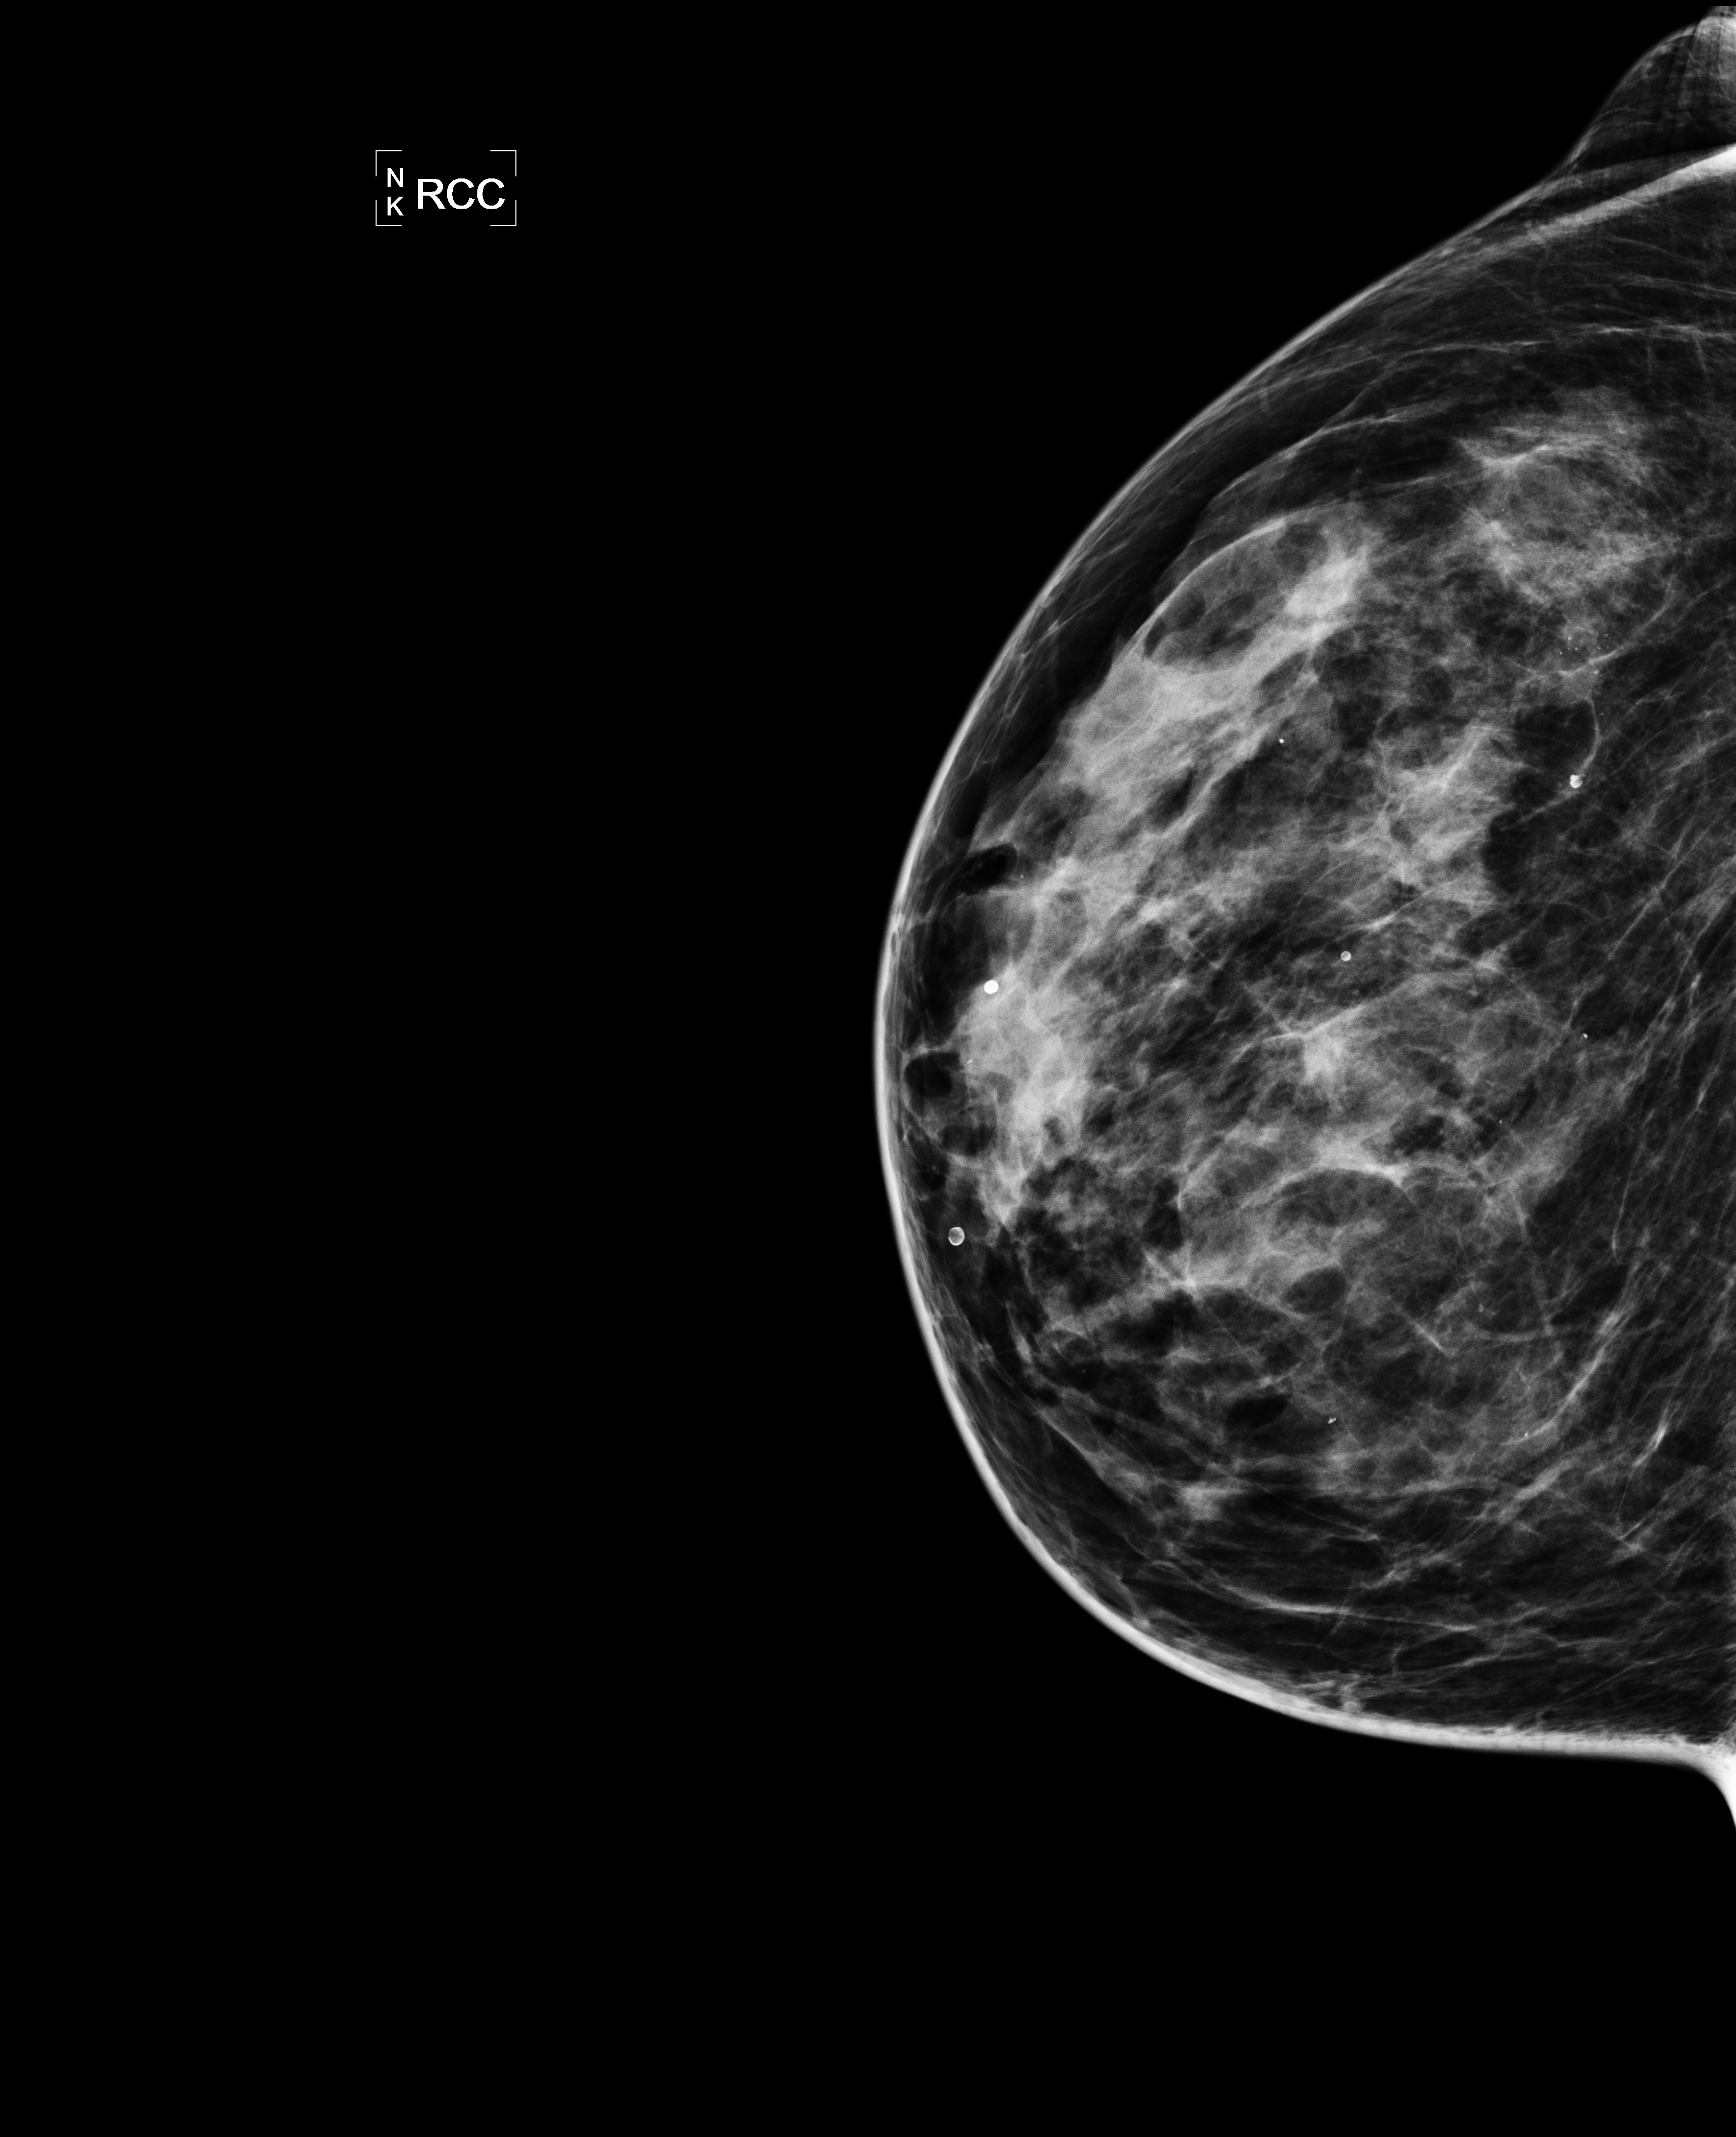

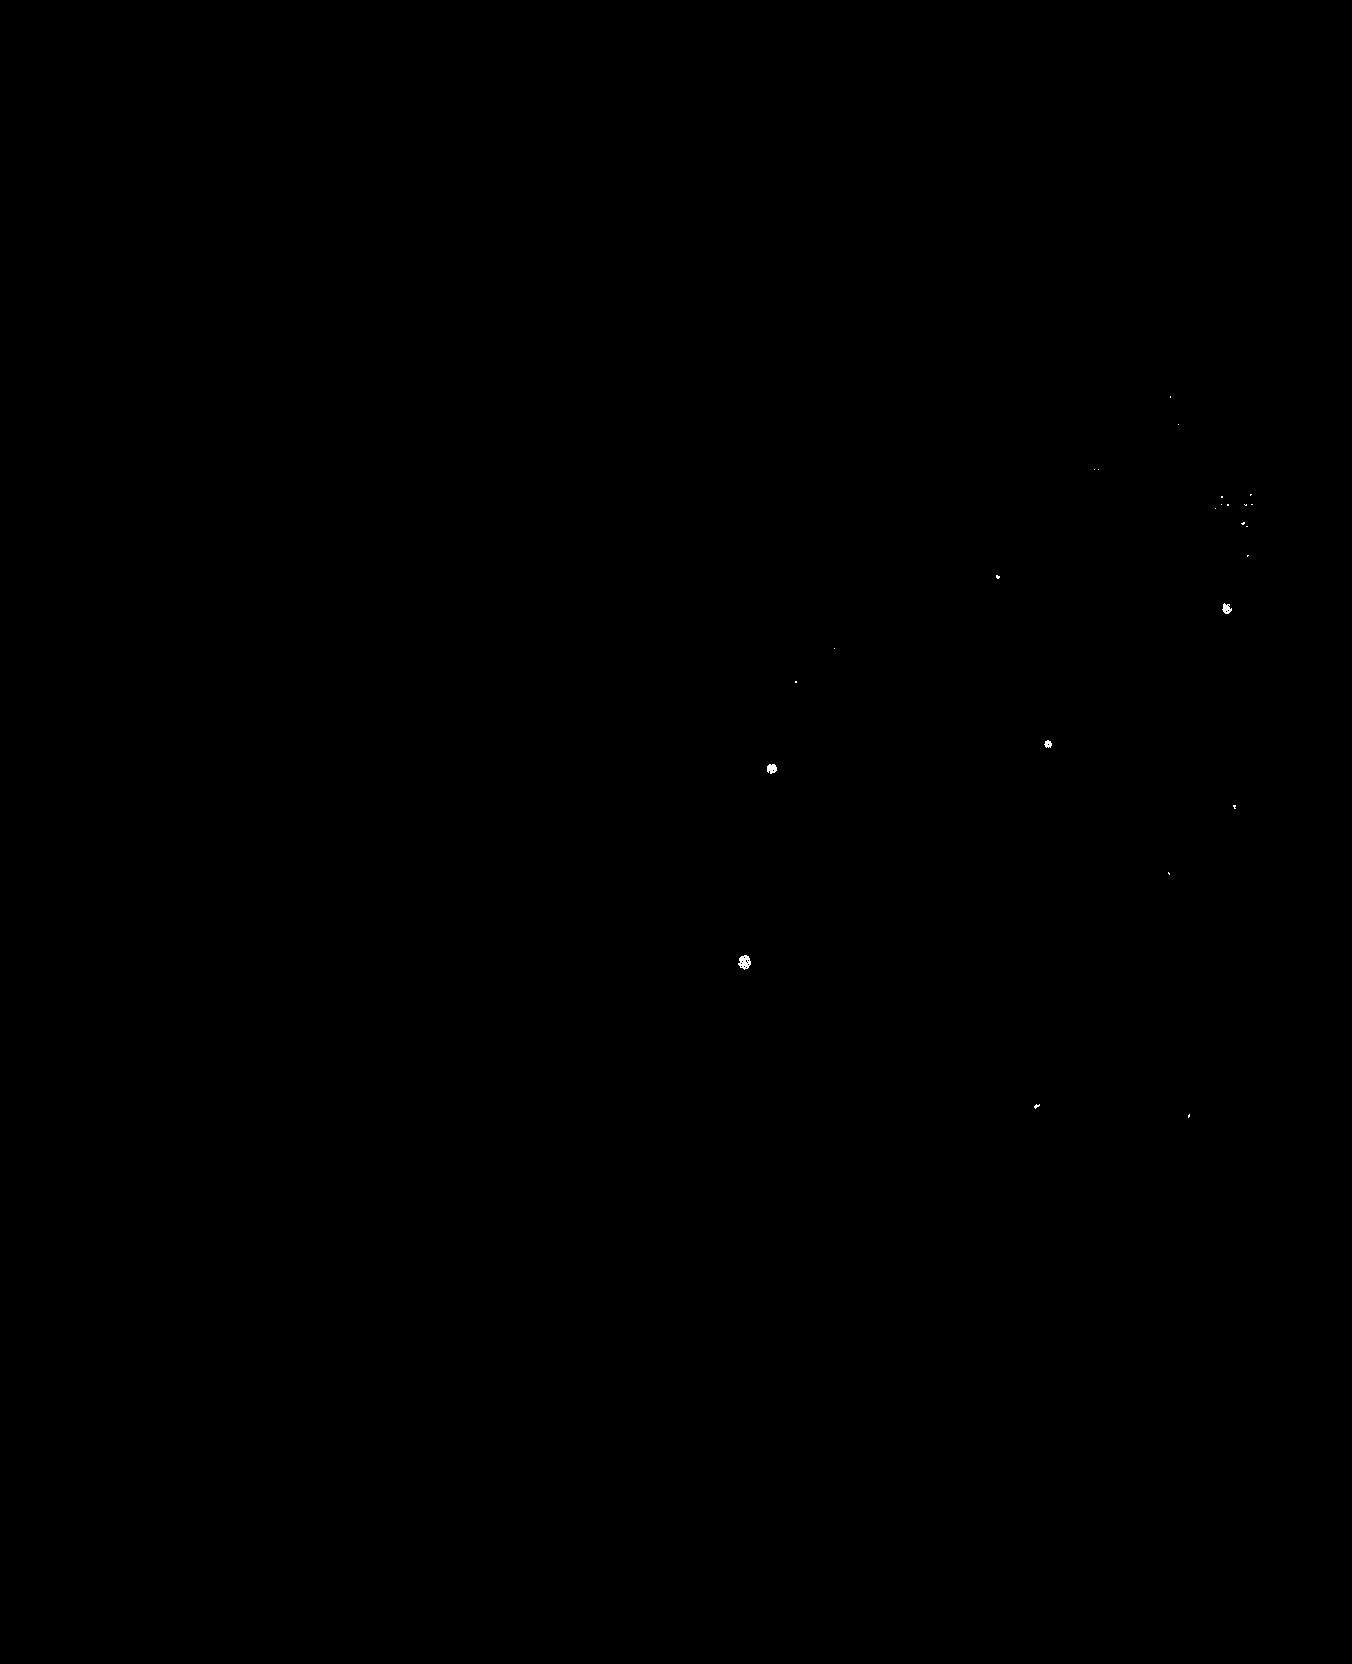

In [ ]:
cv2_imshow(medical_image)
cv2_imshow(mask)

In [ ]:
for (root,dirs,files) in os.walk("/content/drive/MyDrive/Dataset/Dataset"):
  for file in files:
    